In [123]:
#Importing the required libraries
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split , cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score
from xgboost import XGBClassifier

In [119]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\Cloudmantra\Churn_Modelling.csv')    #Importing Dataset

In [59]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [60]:
#To get the information about the dataset
df.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [61]:
#To check the data type
df.dtypes                   

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Data Cleaning

In [62]:
#To check if there is any Null values or rows
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There is no null vlaues and rows

In [63]:
#To check if there is any unique values in dataset
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

we will drop first 3 variables as they are specific to customers.

In [64]:
#Droping the 3 variable which are of no use
df = df.drop(["RowNumber","CustomerId","Surname"], axis=1)

In [65]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Visualization

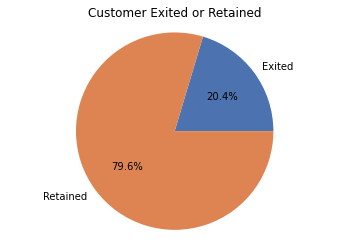

In [66]:
#Pie-Chart
my_lables = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
plt.pie(sizes, labels = my_lables, autopct='%1.1f%%')
plt.title('Customer Exited or Retained')
plt.axis('equal')
plt.show()

About 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn.

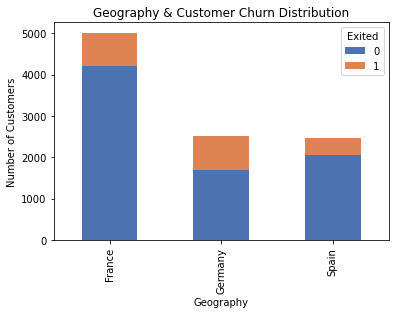

In [67]:
#Plot
palette = "deep" 
sns.set_palette(palette)

pd.crosstab(df['Geography'], df['Exited']).plot(kind='bar', stacked=True)
    
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.title('Geography & Customer Churn Distribution')

plt.show()

Germany exhibits the highest churn rate, with approximately 32% of its customers churning. In comparison, both France and Spain experience a churn rate of around 16% among their respective customer bases.

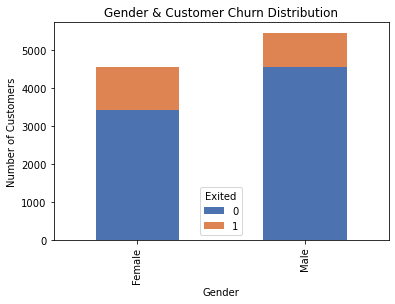

In [68]:
palette = "deep" 
sns.set_palette(palette)

pd.crosstab(df['Gender'], df['Exited']).plot(kind='bar', stacked=True)
    
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Gender & Customer Churn Distribution')

plt.show()

The customer base is divided into male and female customers, with males comprising 54% and females accounting for 45% of the total customer population. 25% of female customers have churned, indicating a higher attrition rate among this group. In comparison, the churn rate for male customers stands at 16%, suggesting relatively lower customer churn in this segment.

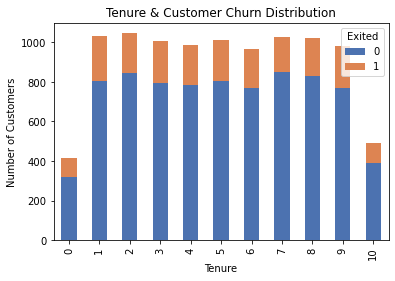

In [69]:
palette = "deep" 
sns.set_palette(palette)

pd.crosstab(df['Tenure'], df['Exited']).plot(kind='bar', stacked=True)
    
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Tenure & Customer Churn Distribution')

plt.show()

The majority of customers, approximately 90%, have a tenure ranging from 1 year to 9 years. This suggests a concentration of customer loyalty within this timeframe, highlighting the significance of establishing long-term relationships with clients.

<AxesSubplot:>

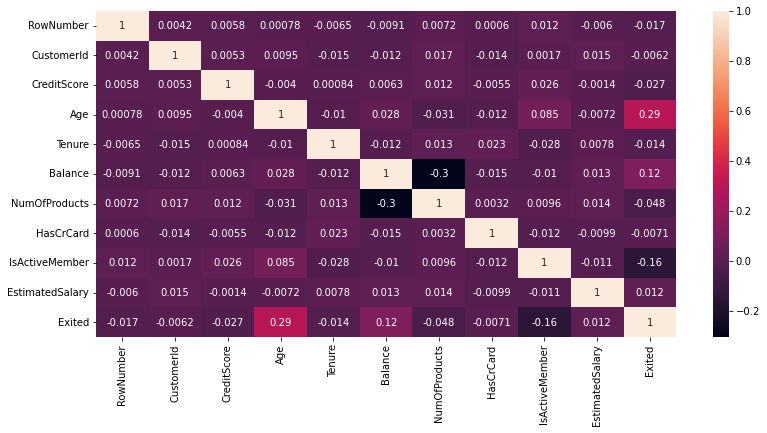

In [132]:
#Correlation Plot
corr = df.corr()
plt.figure(figsize = (13,6))
sns.heatmap(corr, annot = True)

# Splitting the dataset

In [88]:
X = df.drop(columns='Exited')  #Droping the 'Exited' columns and giving it to X 
y = df['Exited']               #Target Feature

In [89]:
# Splitting into Train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [90]:
df = pd.get_dummies(data=df, drop_first=True)    # One Hot Encoding 
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [91]:
# Normalizing the data 
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Model Buiding

# Logestic Regression

In [111]:
clf_lr = LogisticRegression(random_state=0) #Creating the Logistic Regression Model
clf_lr.fit(X_train, y_train)                #Training the Model with X_train & y_train
pred = clf_lr.predict(X_test)                #Predicting the X_test 

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred)   # Getting the Accuracy Score 
f1   = f1_score(y_test, pred)         # Getting the f1 Score 
rec  = recall_score(y_test, pred)     # Getting the recall Score 
prec = precision_score(y_test, pred)  # Getting the Precision Score 
cm   = confusion_matrix(y_test, pred) # Getting the confusion Matrix 

#Defining a DataFrame 
results = pd.DataFrame([['Logistic Regression', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])

#Printing the Model Results with different Metrics
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Logistic Regression,0.811,0.336842,0.237037,0.581818


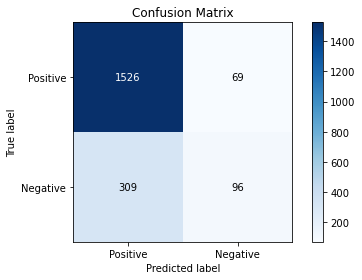

In [112]:
#Printing Confusion Matrix
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

In [113]:
# Cross Validation
accuracies = cross_val_score(estimator=clf_lr, X=X_train, y=y_train, cv=10) 
print(f'Accuracy is:', format(accuracies.mean()*100))  #Printing the Mean of the accuracies
print(f'Standard Deviation is:',format(accuracies.std()*100)) #Printing the Standard Deviation of accuracies

Accuracy is: 80.8375
Standard Deviation is: 0.8786530885395


# Random Forest

In [114]:
#Building the model 
clf_rf = RandomForestClassifier(random_state=0)#Creating the Random Forest Classifier Model
clf_rf.fit(X_train, y_train)                   #Training the Model with X_train & y_train
pred = clf_rf.predict(X_test)                  #Predicting the X_test 

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred)   # Getting the Accuracy Score 
f1   = f1_score(y_test, pred)         # Getting the f1 Score 
rec  = recall_score(y_test, pred)     # Getting the recall Score 
prec = precision_score(y_test, pred)  # Getting the Precision Score 
cm   = confusion_matrix(y_test, pred) # Getting the confusion Matrix 

#Defining a DataFrame 
rf_results = pd.DataFrame([['Random Forest Classifier', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])
results = results.append(rf_results, ignore_index=True)


#Printing the Model Results with different Metrics
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Logistic Regression,0.811,0.336842,0.237037,0.581818
1,Random Forest Classifier,0.867,0.613372,0.520988,0.745583


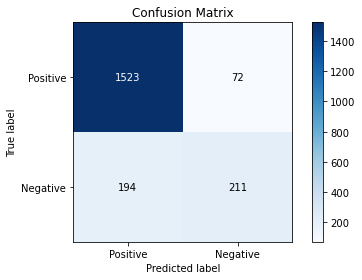

In [115]:
#Printing Confusion Matrix
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

In [116]:
# Cross Validation
accuracies = cross_val_score(estimator=clf_rf, X=X_train, y=y_train, cv=10) 
print(f'Accuracy is:', format(accuracies.mean()*100))  #Printing the Mean of the accuracies
print(f'Standard Deviation is:',format(accuracies.std()*100)) #Printing the Standard Deviation of accuracies

Accuracy is: 85.9625
Standard Deviation is: 1.0186541365939672


# GXboost

In [124]:
#Building the model 
clf_gx = XGBClassifier()      #Creating the GXboost Model
clf_gx.fit(X_train, y_train)  #Training the Model with X_train & y_train
pred = clf_gx.predict(X_test) #Predicting the X_test 

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred)   # Getting the Accuracy Score 
f1   = f1_score(y_test, pred)         # Getting the f1 Score 
rec  = recall_score(y_test, pred)     # Getting the recall Score 
prec = precision_score(y_test, pred)  # Getting the Precision Score 
cm   = confusion_matrix(y_test, pred) # Getting the confusion Matrix 

#Defining a DataFrame 
rf_results = pd.DataFrame([['GXboost', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])
results = results.append(rf_results, ignore_index=True)


#Printing the Model Results with different Metrics
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Logistic Regression,0.8110,0.336842,0.237037,0.581818
1,Random Forest Classifier,0.8670,0.613372,0.520988,0.745583
2,GXboost,0.8545,0.599725,0.538272,0.677019


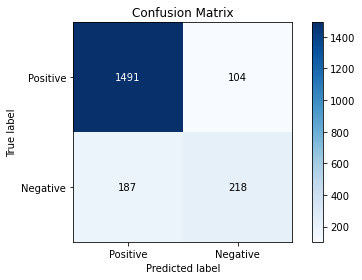

In [125]:
#Printing Confusion Matrix
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

In [126]:
# Cross Validation
accuracies = cross_val_score(estimator=clf_gx, X=X_train, y=y_train, cv=10) 
print(f'Accuracy is:', format(accuracies.mean()*100))  #Printing the Mean of the accuracies
print(f'Standard Deviation is:',format(accuracies.std()*100)) #Printing the Standard Deviation of accuracies

Accuracy is: 85.2375
Standard Deviation is: 1.217643728682573


# Final Model

In [127]:
# Model Building
final_clf = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=19,
                       min_samples_leaf=5, min_samples_split=35,
                       n_estimators=900, random_state=0, warm_start=True)
final_clf.fit(X_train, y_train)                 #Training the Model with X_train & y_train
pred = clf_lr.predict(X_test)                   #Predicting the X_test 

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred)   # Getting the Accuracy Score 
f1   = f1_score(y_test, pred)         # Getting the f1 Score 
rec  = recall_score(y_test, pred)     # Getting the recall Score 
prec = precision_score(y_test, pred)  # Getting the Precision Score 
cm   = confusion_matrix(y_test, pred) # Getting the confusion Matrix 

#Defining a DataFrame 
model_results = pd.DataFrame([['Final Hypertuned Random Forest Classifier', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])

results = results.append(model_results, ignore_index=True)
#Printing the Model Results with different Metrics
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Logistic Regression,0.8110,0.336842,0.237037,0.581818
1,Random Forest Classifier,0.8670,0.613372,0.520988,0.745583
2,GXboost,0.8545,0.599725,0.538272,0.677019
3,Final Hypertuned Random Forest Classifier,0.8110,0.336842,0.237037,0.581818


In [130]:
# Cross Validation
accuracies = cross_val_score(estimator=final_clf, X=X_train, y=y_train, cv=10) 
print(f'Accuracy is:', format(accuracies.mean()*100))  #Printing the Mean of the accuracies
print(f'Standard Deviation is:',format(accuracies.std()*100)) #Printing the Standard Deviation of accuraciesa

Accuracy is: 86.39999999999999
Standard Deviation is: 0.9934158243152772
